# Ensemble Learning

## Initial Imports

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import numpy as np
import pandas as pd
from pathlib import Path
from collections import Counter

In [3]:
from sklearn.metrics import balanced_accuracy_score
from sklearn.metrics import confusion_matrix
from imblearn.metrics import classification_report_imbalanced
from sklearn.model_selection import train_test_split

from sklearn.preprocessing import LabelEncoder, StandardScaler

from imblearn.ensemble import BalancedRandomForestClassifier
from sklearn.datasets import make_classification

from imblearn.ensemble import EasyEnsembleClassifier 

from sklearn.metrics import precision_recall_fscore_support

## Read the CSV and Perform Basic Data Cleaning

In [4]:
# Load the data
file_path = Path('LoanStats_2019Q1.csv')
df = pd.read_csv(file_path)

# Preview the data
df.head()



,loan_amnt,int_rate,installment,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,dti,...,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,hardship_flag,debt_settlement_flag
0,10500.0,0.1719,375.35,RENT,66000.0,Source Verified,Mar-2019,low_risk,n,27.24,...,85.7,100.0,0.0,0.0,65687.0,38199.0,2000.0,61987.0,N,N
1,25000.0,0.2000,929.09,MORTGAGE,105000.0,Verified,Mar-2019,low_risk,n,20.23,...,91.2,50.0,1.0,0.0,271427.0,60641.0,41200.0,49197.0,N,N
2,20000.0,0.2000,529.88,MORTGAGE,56000.0,Verified,Mar-2019,low_risk,n,24.26,...,66.7,50.0,0.0,0.0,60644.0,45684.0,7500.0,43144.0,N,N
3,10000.0,0.1640,353.55,RENT,92000.0,Verified,Mar-2019,low_risk,n,31.44,...,100.0,50.0,1.0,0.0,99506.0,68784.0,19700.0,76506.0,N,N
4,22000.0,0.1474,520.39,MORTGAGE,52000.0,Not Verified,Mar-2019,low_risk,n,18.76,...,100.0,0.0,0.0,0.0,219750.0,25919.0,27600.0,20000.0,N,N


## Split the Data into Training and Testing

In [5]:
# Create our features
# YOUR CODE HERE

# Creating an instance of label encoder


le = LabelEncoder()

le.fit(df["home_ownership"])
df["home_ownership"] = le.transform(df["home_ownership"])

le.fit(df["verification_status"])
df["verification_status"] = le.transform(df["verification_status"])

le.fit(df["issue_d"])
df["issue_d"] = le.transform(df["issue_d"])

le.fit(df["pymnt_plan"])
df["pymnt_plan"] = le.transform(df["pymnt_plan"])

le.fit(df["initial_list_status"])
df["initial_list_status"] = le.transform(df["initial_list_status"])

le.fit(df["next_pymnt_d"])
df["next_pymnt_d"] = le.transform(df["next_pymnt_d"])

le.fit(df["application_type"])
df["application_type"] = le.transform(df["application_type"])

le.fit(df["hardship_flag"])
df["hardship_flag"] = le.transform(df["hardship_flag"])

le.fit(df["debt_settlement_flag"])
df["debt_settlement_flag"] = le.transform(df["debt_settlement_flag"])

# new_df = pd.get_dummies(df, columns=["home_ownership",'loan_status','verification_status','issue_d','hardship_flag','debt_settlement_flag','pymnt_plan','initial_list_status','next_pymnt_d','application_type'],drop_first=True)


X = df.drop(columns='loan_status')
# # Create our target
#  # YOUR CODE HERE

y = df['loan_status']


df.head()

,loan_amnt,int_rate,installment,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,dti,...,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,hardship_flag,debt_settlement_flag
0,10500.0,0.1719,375.35,3,66000.0,1,2,low_risk,0,27.24,...,85.7,100.0,0.0,0.0,65687.0,38199.0,2000.0,61987.0,0,0
1,25000.0,0.2000,929.09,1,105000.0,2,2,low_risk,0,20.23,...,91.2,50.0,1.0,0.0,271427.0,60641.0,41200.0,49197.0,0,0
2,20000.0,0.2000,529.88,1,56000.0,2,2,low_risk,0,24.26,...,66.7,50.0,0.0,0.0,60644.0,45684.0,7500.0,43144.0,0,0
3,10000.0,0.1640,353.55,3,92000.0,2,2,low_risk,0,31.44,...,100.0,50.0,1.0,0.0,99506.0,68784.0,19700.0,76506.0,0,0
4,22000.0,0.1474,520.39,1,52000.0,0,2,low_risk,0,18.76,...,100.0,0.0,0.0,0.0,219750.0,25919.0,27600.0,20000.0,0,0


In [6]:
X.describe()

,loan_amnt,int_rate,installment,home_ownership,annual_inc,verification_status,issue_d,pymnt_plan,dti,delinq_2yrs,...,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,hardship_flag,debt_settlement_flag
count,68817.000000,68817.000000,68817.000000,68817.000000,6.881700e+04,68817.000000,68817.000000,68817.0,68817.000000,68817.000000,...,68817.000000,68817.000000,68817.000000,68817.0,6.881700e+04,6.881700e+04,68817.000000,6.881700e+04,68817.0,68817.0
mean,16677.594562,0.127718,480.652863,1.812779,8.821371e+04,0.669994,0.805542,0.0,21.778153,0.217766,...,95.057627,30.626217,0.125972,0.0,2.100332e+05,6.133843e+04,29734.128558,5.572240e+04,0.0,0.0
std,10277.348590,0.048130,288.062432,0.941313,1.155800e+05,0.719105,0.714932,0.0,20.199244,0.718367,...,8.326426,33.631463,0.336732,0.0,1.928088e+05,5.738798e+04,26795.394232,5.095845e+04,0.0,0.0
min,1000.000000,0.060000,30.890000,0.000000,4.000000e+01,0.000000,0.000000,0.0,0.000000,0.000000,...,20.000000,0.000000,0.000000,0.0,3.600000e+03,2.350000e+02,100.000000,1.270000e+02,0.0,0.0
25%,9000.000000,0.088100,265.730000,1.000000,5.000000e+04,0.000000,0.000000,0.0,13.890000,0.000000,...,93.000000,0.000000,0.000000,0.0,6.697700e+04,2.650300e+04,11600.000000,2.288000e+04,0.0,0.0
50%,15000.000000,0.118000,404.560000,1.000000,7.300000e+04,1.000000,1.000000,0.0,19.760000,0.000000,...,100.000000,20.000000,0.000000,0.0,1.467100e+05,4.535700e+04,22100.000000,4.200000e+04,0.0,0.0
75%,24000.000000,0.155700,648.100000,3.000000,1.040000e+05,1.000000,1.000000,0.0,26.660000,0.000000,...,100.000000,50.000000,0.000000,0.0,3.036400e+05,7.657000e+04,39300.000000,7.249900e+04,0.0,0.0
max,40000.000000,0.308400,1676.230000,3.000000,8.797500e+06,2.000000,2.000000,0.0,999.000000,18.000000,...,100.000000,100.000000,4.000000,0.0,3.292782e+06,1.295455e+06,509400.000000,1.426964e+06,0.0,0.0


In [7]:
# Check the balance of our target values
# YOUR CODE HERE
Counter(y)

y.value_counts()

# this is pretty unbalanced

low_risk     68470
high_risk      347
Name: loan_status, dtype: int64

In [8]:
# Split the X and y into X_train, X_test, y_train, y_test
# YOUR CODE HERE


X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    random_state=1, 
                                                    stratify=y)

## Data Pre-Processing

Scale the training and testing data using the `StandardScaler` from `sklearn`. Remember that when scaling the data, you only scale the features data (`X_train` and `X_testing`).

In [9]:
# Create the StandardScaler instance
# YOUR CODE HERE
scaler = StandardScaler()


In [10]:
# Fit the Standard Scaler with the training data
# When fitting scaling functions, only train on the training dataset
# YOUR CODE HERE

X_scaler = scaler.fit(X_train)

In [11]:
# Scale the training and testing data
# YOUR CODE HERE

X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

## Ensemble Learners

In this section, you will compare two ensemble algorithms to determine which algorithm results in the best performance. You will train a Balanced Random Forest Classifier and an Easy Ensemble classifier . For each algorithm, be sure to complete the folliowing steps:

1. Train the model using the training data. 
2. Calculate the balanced accuracy score from sklearn.metrics.
3. Display the confusion matrix from sklearn.metrics.
4. Generate a classication report using the `imbalanced_classification_report` from imbalanced-learn.
5. For the Balanced Random Forest Classifier only, print the feature importance sorted in descending order (most important feature to least important) along with the feature score

Note: Use a random state of 1 for each algorithm to ensure consistency between tests

### Balanced Random Forest Classifier

In [12]:
# Resample the training data with the BalancedRandomForestClassifier
# YOUR CODE HERE

BRF = BalancedRandomForestClassifier(random_state=1) 

BRF.fit(X_train_scaled, y_train)



BalancedRandomForestClassifier(random_state=1)

In [13]:
# Calculated the balanced accuracy score
# YOUR CODE HERE

y_pred = BRF.predict(X_test_scaled)
balanced_accuracy_score(y_test, y_pred)

0.7632971544371523

In [14]:
# Display the confusion matrix
# YOUR CODE HERE

confusion_matrix(y_test, y_pred)

array([[   57,    30],
       [ 2201, 14917]], dtype=int64)

In [15]:
# Print the imbalanced classification report
# YOUR CODE HERE

print(classification_report_imbalanced(y_test, BRF.predict(X_test_scaled)))

                   pre       rec       spe        f1       geo       iba       sup

  high_risk       0.03      0.66      0.87      0.05      0.76      0.56        87
   low_risk       1.00      0.87      0.66      0.93      0.76      0.58     17118

avg / total       0.99      0.87      0.66      0.93      0.76      0.58     17205



In [16]:
# List the features sorted in descending order by feature importance
# YOUR CODE HERE

importances = BRF.feature_importances_
sorted(zip(BRF.feature_importances_, X.columns), reverse=True)

[(0.0813794468437654, 'total_rec_prncp'),
 (0.06418489100033847, 'last_pymnt_amnt'),
 (0.06295948018853922, 'total_pymnt_inv'),
 (0.057137400997254374, 'total_pymnt'),
 (0.04766027833531938, 'total_rec_int'),
 (0.02670271626050664, 'int_rate'),
 (0.02349411021992901, 'issue_d'),
 (0.018585321545996108, 'annual_inc'),
 (0.01833373761851926, 'installment'),
 (0.017292525336509743, 'mths_since_recent_inq'),
 (0.01723744299838225, 'dti'),
 (0.01641175995495965, 'tot_hi_cred_lim'),
 (0.016258989852809942, 'all_util'),
 (0.01616334482568218, 'total_bal_ex_mort'),
 (0.01606644792960738, 'max_bal_bc'),
 (0.016035681440844853, 'mo_sin_old_rev_tl_op'),
 (0.015936910368223915, 'out_prncp_inv'),
 (0.015873243094750432, 'il_util'),
 (0.015374796839656165, 'bc_util'),
 (0.015233821519991244, 'revol_bal'),
 (0.014051994575389205, 'num_rev_accts'),
 (0.013933350382382987, 'out_prncp'),
 (0.01374843934554049, 'mths_since_recent_bc'),
 (0.013520546518050009, 'tot_cur_bal'),
 (0.01268488694693607, 'total


Bad key "text.kerning_factor" on line 4 in
C:\Users\Sean\anaconda3\envs\pyvizenv\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
http://github.com/matplotlib/matplotlib/blob/master/matplotlibrc.template
or from the matplotlib source distribution


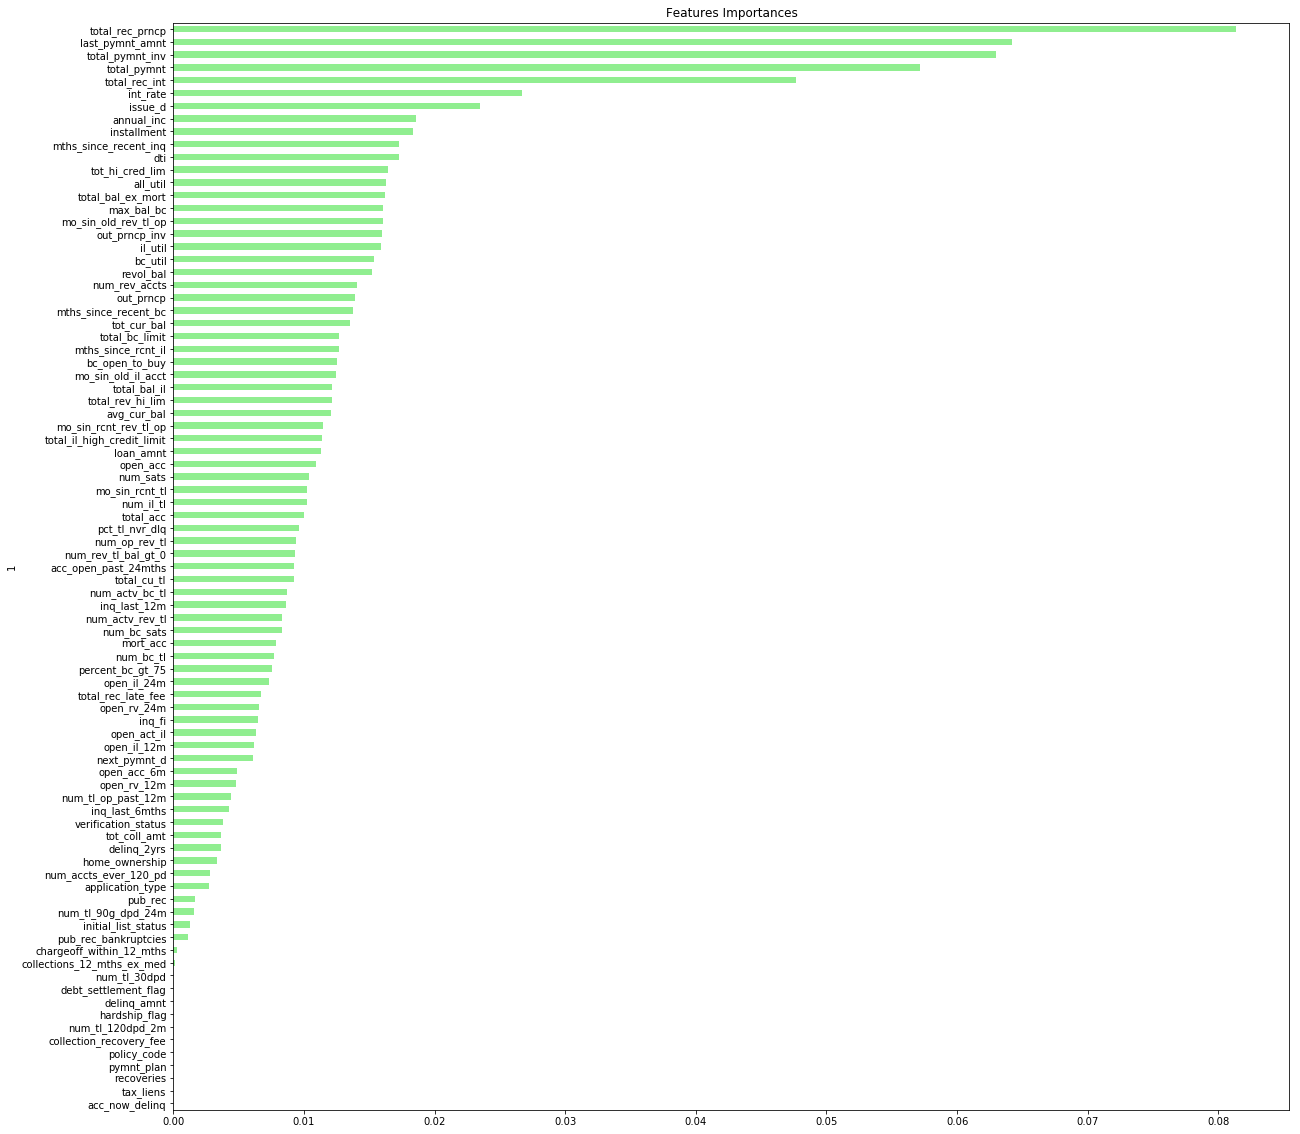

In [17]:
importances_df = pd.DataFrame(sorted(zip(BRF.feature_importances_, X.columns), reverse=True))
importances_df.set_index(importances_df[1], inplace=True)
importances_df.drop(columns=1, inplace=True)
importances_df.rename(columns={0: 'Feature Importances'}, inplace=True)
importances_sorted = importances_df.sort_values(by='Feature Importances')
importances_sorted.plot(kind='barh', color='lightgreen', title= 'Features Importances', legend=False,figsize = (20,20))

### Easy Ensemble Classifier

In [18]:
# Train the Classifier
# YOUR CODE HERE

eec = EasyEnsembleClassifier(random_state=1)
eec.fit(X_train_scaled, y_train) 

EasyEnsembleClassifier(random_state=1)

In [19]:
# Calculated the balanced accuracy score
# YOUR CODE HERE

y_pred_1 = eec.predict(X_test_scaled)
balanced_accuracy_score(y_test, y_pred_1)




0.9098881596706028

In [20]:
# Display the confusion matrix
# YOUR CODE HERE

confusion_matrix(y_test, y_pred_1)

array([[   79,     8],
       [ 1511, 15607]], dtype=int64)

In [21]:
# Print the imbalanced classification report
# YOUR CODE HERE

print(classification_report_imbalanced(y_test, eec.predict(X_test_scaled)))

                   pre       rec       spe        f1       geo       iba       sup

  high_risk       0.05      0.91      0.91      0.09      0.91      0.83        87
   low_risk       1.00      0.91      0.91      0.95      0.91      0.83     17118

avg / total       0.99      0.91      0.91      0.95      0.91      0.83     17205



In [24]:
precision_recall_fscore_support(y_test, y_pred_1, average='micro')[0]

0.9117117117117117

### Final Questions

1. Which model had the best balanced accuracy score?

    YOUR ANSWER HERE.

2. Which model had the best recall score?

    YOUR ANSWER HERE.

3. Which model had the best geometric mean score?

    YOUR ANSWER HERE.

4. What are the top three features?

    YOUR ANSWER HERE.

1.)  The EEC model had a balanced accuracy score of 0.9098881596706028 vs. the balanced random forest at 0.7632971544371523 (RUN FOREST... RUN!)- EEC better 

2.)  The BRC model had a recall score .87 while EEC had a score of .91 - EEC better 

3.) EEC had a geo score of .91 while BRC had a score of .76 - EEC better 

4.) It appears that the top 3 features in the model are total rec principle, total rec interest, and total payment inv.  I was unable to find in the documentation a method/feature to extract feature importance in the EEC model. 